# MA060129, Bayesian Machine Learning Homework 3: Practical Problems

#### List of problems:
[Task 1](#Task1) 30 points

[Task 2](#Task2) 15 points

[Task 3](#Task3) 5 points 

[Task 4](#Task4) 10 points 

------ Total : 60 points  -------

[Bonus](#Bonus) 20 point

## Variational Autoencoders

VAEs consider two-step generative process by a prior over latent space $p(z)$ and a conditional generative distribution $p_{\theta}(x|z)$, which is parametrized by a deep neural network (DNN). Our goal is to maximize marginal log-likehood  which is intractable in general case. Therefore, variational inference (VI) framework is considered.

\begin{equation*}
    \begin{aligned}
    & \log p(x) \geq \mathcal{L}(x;\theta;q) = \mathbb{E}_{z\sim q(z)}[\log p_{\theta}(x|z)] - \text{KL}[q(z)\|p(z)],
    \end{aligned}
\end{equation*}

where $q(z|x)$ is a variational posterior distribution. Given data distribution $p_e(x) = \frac1N\sum_{i=1}^N \delta_{x_i}(x)$ we aim at maximizing the average marginal log-likelihood. Following the variational auto-encoder architecture amortized inference is proposed by choice of the variational distribution $q_{\phi}(z|x)$ which is also parametrized by DNN.

\begin{equation*}
    \begin{aligned}
    & \arg\max\limits_{\phi, \theta}\mathbb{E}_{x}\mathcal{L}(x,\phi,\theta)=\arg\max\limits_{\phi, \theta}\mathbb{E}_{x}\mathbb{E}_{z\sim q(z)}[\log p_{\theta}(x|z)] - \mathbb{E}_x \text{KL}[q_{\phi}(z|x)\|p(z)].
    \end{aligned}
\end{equation*}

To evaluate the performance of the VAE approach, we will estimate a negative log likelihood (NLL) on the test set. NLL is calculated by importance sampling method:
\begin{equation*}
   - \log p(x) \approx - \log \frac{1}{K} 
   \sum_{i = 1}^K \frac{p_\theta(x | z_i) p(z_i)}{q_\phi(z_i | x)},\,\,\,\,z_i \sim q_\phi(z | x).     
\end{equation*}

### References
1. Auto-Encoding Variational Bayes https://arxiv.org/pdf/1312.6114.pdf
2. Beta-VAE https://pdfs.semanticscholar.org/a902/26c41b79f8b06007609f39f82757073641e2.pdf
3. Importance Weighted Autoencoders https://arxiv.org/pdf/1509.00519.pdf 

## VAE
Below you can find emty class for VAE model. It contians methods, which will help you to make all the tasks in this aasignment. You can use code from the VAE seminar to implement the methods, if you use other sources, provide the reference, please.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# cd /content/drive/MyDrive/Skoltech/Bayesian/

/content/drive/MyDrive/Skoltech/Bayesian


In [3]:
# ls

In [1]:
import math 
from tqdm import tqdm
def log_gaussian(x, mean, logvar, dim=-1):
    log_normal = -0.5 * (logvar + 
                         torch.pow(x - mean, 2) / (logvar.exp()+1e-5))
    return log_normal.sum(dim=dim)

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pylab as plt

import torch
import torch.nn as nn

import torchvision

from torch.functional import F
class VAE(nn.Module):
    def __init__(self, x_dim, z_dim, hid_dim):
        """
        z_dim: int, dimention of the latent space
        x_dim: int, input image will have size (3, x_dim, x_dim)
        """
        super(VAE, self).__init__()
        self.hid_dim = hid_dim
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.x_dim_linear = 3 * x_dim * x_dim
        self.x_logsigma = math.log(0.01)
        
        # Initialize Encoder and Decoder networks
        
        # self.encoder = nn.Sequential(
        #     nn.Linear(x_dim, hid_dim),
        #     nn.LeakyReLU()      
        # )
        
        # self.encoder = nn.Sequential( nn.Conv2d(3, 16, 3, stride=2, padding=1),
        #                             nn.ReLU(),
        #                             nn.Conv2d(16, 32, 3, stride=2, padding=1),
        #                             nn.ReLU(),
        #                             nn.BatchNorm2d(32),
        #                             nn.Conv2d(32, 64, 3, stride=2, padding=1),
        #                             nn.ReLU(),
        #                             nn.Conv2d(64, 128, 3, stride=2, padding=1),
        #                             nn.ReLU(),
        #                             nn.BatchNorm2d(128),
        #                             nn.Flatten()
        #                          )
        # self.conv_out_dim = int(np.prod((128, x_dim // 8, x_dim // 8)))
        
        # self.encoder_mu = nn.Linear(self.conv_out_dim, z_dim)
        # self.encoder_logsigma = nn.Linear(self.conv_out_dim, z_dim)
        

        
        # self.decoder = nn.Sequential(  nn.Linear(z_dim, self.conv_out_dim),
        #                             nn.Unflatten(-1, (self.conv_out_dim, 1, 1)),
        #                             nn.ConvTranspose2d(self.conv_out_dim, 128, 3, stride=2),
        #                             nn.ReLU(),
        #                             nn.ConvTranspose2d(128, 64, 3, stride=2),
        #                             nn.ReLU(),
        #                             nn.BatchNorm2d(64),
        #                             nn.ConvTranspose2d(64, 32, 3, stride=2),
        #                             nn.ReLU()

        #                             # nn.BatchNorm2d(16),
        #                             # nn.ConvTranspose2d(16, 8, 3, stride=2 ,padding=1),
        #                             # nn.ReLU()
        #                          )
        
        
        # self.decoder_mu =  nn.Sequential(
        #                     nn.ConvTranspose2d(8, 3, 6,  stride=2),
        #                     nn.Sigmoid()
        #                     )
        # self.decoder_logsigma=  nn.Linear(self.x_dim_linear, self.x_dim_linear)
        
        self.encoder = nn.Sequential(
            nn.Conv2d( 3, 32, kernel_size=4, stride=2), nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=4, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=4, stride=2), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Flatten()
        ).to(device)

        self.encoder_mu = nn.Linear(hid_dim, z_dim).to(device)
        self.encoder_logsigma = nn.Linear(hid_dim, z_dim).to(device)

        self.decoder = nn.Sequential(
            nn.Linear(z_dim, hid_dim), nn.Unflatten(1, (hid_dim, 1, 1)),
            nn.ConvTranspose2d(hid_dim, 128, kernel_size=5, stride=2), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=6, stride=2), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 3, kernel_size=6, stride=2), nn.Sigmoid()
        ).to(device)
        
       
        self.init_params()

    def init_params(self):
        for m in self.modules():
            if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                nn.init.xavier_normal_(m.weight.data)
        
    def q_z(self, x):
        """
        VARIATIONAL POSTERIOR
        :param x: input image
        :return: parameters of q(z|x), (MB, hid_dim)
        """
        ## YOUR CODE HERE
        f = self.encoder(x)
        return self.encoder_mu(f), self.encoder_logsigma(f)

    def p_x(self, z):
        """
        GENERATIVE DISTRIBUTION
        :param z: latent vector          (MB, hid_dim)
        :return: parameters of p(x|z)    (MB, inp_dim)
        """
        ## YOUR CODE HERE
        # f = self.decoder_fc(z)
        f = self.decoder(z)
        
#         f = self.decoder(f)
#         f = f.view(f.shape[0], -1)
        # f = self.decoder_mu(f)
        
        return f, self.x_logsigma * torch.ones_like(f)

    def forward(self, x):
        """
        Encoder the image, sample z and decode 
        :param x: input image
        :return: parameters of p(x|z_hat), z_hat, parameters of q(z|x)
        """
        # YOUR CODE HERE
        z_mu, z_logvar = self.q_z(x)
        z_sample = self.reparametrize(z_mu, z_logvar)
        x_mu, x_logvar = self.p_x(z_sample)
        
        return x_mu, x_logvar, z_sample, z_mu, z_logvar

    def log_p_z(self, z):
        """
        Log density of the Prior
        :param z: latent vector     (MB, hid_dim)
        :return: \sum_i log p(z_i)  (1, )
        """
        # YOUR CODE HERE
        return log_gaussian(z, torch.zeros(z.shape[1]), torch.ones(z.shape[1]), dim=2)

    def reconstruct_x(self, x):
        x_mean, _, _, _, _ = self.forward(x)
        return x_mean

    def kl(self, z_mu, z_logsigma):
        """
        KL-divergence between p(z) and q(z|x)
        :param z:                               (MB, hid_dim)
        :param z_mean: mean of q(z|x)           (MB, hid_dim)
        :param z_logvar: log variance of q(z|x) (MB, hid_dim)
        :return: KL                             (MB, )
        """
        # YOUR CODE HERE
#         p_logsigma = torch.zeros_like(z_mu)
#         p_mu = torch.zeros_like(z_logsigma)
#         q_mu = z_mu
#         q_logsigma = z_logsigma

#         p_cov = torch.stack([torch.diag(sigma) for sigma in torch.exp(p_logsigma)])
#         p = torch.distributions.MultivariateNormal(p_mu, p_cov)

#         q_cov = torch.stack([torch.diag(sigma) for sigma in torch.exp(q_logsigma)])
#         q = torch.distributions.MultivariateNormal(q_mu, q_cov)

#         kl = torch.distributions.kl.kl_divergence(p, q)
        kl = -0.5 * (torch.ones_like(z_logsigma) + z_logsigma - torch.pow(z_mu, 2) - z_logsigma.exp())         
        
        return kl.sum(dim=1)

    def calculate_loss(self, x, beta=1.):
        """
        Given the input batch, compute the negative ELBO 
        :param x:   (MB, inp_dim)
        :param beta: Float
        :return: nll + beta * KL  (MB, ) or (1, )
        """
        N = x.shape[0]
        x_mu, x_logsigma, z_sample, z_mu, z_logsigma = self.forward(x)

        # compute KL between variational posterior N(z_mu, z_var) and prior N(0, 1)
        kl = self.kl(z_mu, z_logsigma)

        # sample z from var posterior by reparametrization

        nll = -log_gaussian(x, x_mu, x_logsigma, dim = [3, 2, 1])

        return nll.mean(), kl.mean()

    def calculate_nll(self, X, K=2):
        """
        Estimate NLL by importance sampling 
        (see VAE seminar, but be carefull with dimetions)
        :param X: dataset, (N, 3, w, h)
        :param samples: Samples per observation
        :return: IS estimate
        """
        # YOUR CODE HERE
        
        N = X.shape[0]

        # Get proposal and sample from it K times
        z_mu, z_logsigma = self.q_z(X)
        z_sample = self.reparametrize(z_mu.repeat((K, 1, 1)), z_logsigma.repeat((K, 1, 1))) # (K, N, z_dim)
        
        # log prior
        log_p = log_gaussian(z_sample, torch.zeros_like(z_sample), torch.zeros_like(z_sample), 2)

        # log posterior
        log_q = log_gaussian(z_sample, z_mu.unsqueeze(0), z_logsigma.unsqueeze(0), dim=2)
        
        
        kl = self.kl(z_mu, z_logsigma)


        # generative distribution
        x_mu, x_logsigma = self.p_x(z_sample.reshape(N*K, -1))
        log_p_x = log_gaussian(X.reshape(1, N, -1), x_mu.reshape(K, N, -1), x_logsigma.reshape(K, N, -1), 2)

        log_lik = torch.logsumexp(log_p_x + log_p - log_q, 0) - np.log(K)

        return -(log_lik).mean(), kl.mean()

    def generate_x(self, N=25):
        """
        Sample, using you VAE: sample z from prior and decode it 
        :param N: number of samples
        :return: X (N, inp_size)
        """
        z_sample = self.reparametrize(torch.zeros(self.z_dim).repeat(N, 1), torch.zeros(self.z_dim).repeat(N, 1)).to(device)
        
        x_mean, x_logsigma = self.p_x(z_sample)
        
        return x_mean

    @staticmethod
    def reparametrize(mu, logvar):
        std = logvar.mul(0.5).exp_()
        eps = torch.FloatTensor(std.size()).normal_().to(mu.device)
        return eps.mul(std).add_(mu)

## Generalization

The size of the Dataset, that is used to train generative model is often exponentially small compared to the support of density $p(x)$. Thus, it is important to be able to evaluate genralization abilities of the learned model.

In this assignment you will be asked to evaluate generalization ability of the VAE, using the approach discussed in https://arxiv.org/abs/1811.03259. 

Authors propose to study the generalization ability of the generative model, using **probing features** - functions which map image to a value. E.g., number of objects on the images.


We will use the dataset with dots, which can be downloaded [here](https://drive.google.com/open?id=1CsDMOIGEsD1l3BLhuQDfEfEmLEb83wMz). 

---
<a id='Task1'></a>
**Task 1. [30 pts]: Training**
* Train your VAE on the **subset** of images contating only 3 dots (use batch 0-5 for training and leave 6 and 7 for validation). 
* Plot ELBO vs Iteration, KL vs Iteration and NLL vs Iteration during training.
* Plot 10 pairs of `image`-`reconstruction` for 10 random images from the validation dataset 
* Plot 10 samples from the model

Note, that the task is considered completed only if your model produces reasonable **reconstructions** and **samples**. By resonable I mean:
- Reconstructions and true images have the same number of dots of similar colors
- Samples have dots of different colors on them (they may not have perfect shapes)

In [3]:
def load_data(batch_names,classes):
    images = None
    labels = None
    for batch, c in zip(batch_names, classes):
        data = np.load(batch)['images'][::16]
        length = data.shape[0]
        if images is None:
            images = data
        else:
            images = np.vstack((images, data))

        if labels is None:
            labels = torch.ones((length, 1)) * c
        else:
            labels = torch.vstack((labels,  torch.ones((length, 1)) * c))
            
    return torch.tensor(images).permute(0, 3, 1, 2), labels
# three_dots_path = "dots/3_dots/3_dots/batch{}.npz"


In [4]:
from torch.utils.data import Dataset, DataLoader
class ClassDataset(Dataset):

    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [9]:
batch_names = [f"dots/3_dots/batch{i}.npz" for i in range(6)]
classes = [3 for i in range(6)]
data, labels = load_data(batch_names,classes)
# labels = torch.LongTensor(labels)

class_dataset = ClassDataset(data, labels.long())
train_loader = torch.utils.data.DataLoader(class_dataset, batch_size=16, shuffle=True)


In [5]:
def train_vae(train_loader, max_epoch, vae, device):
    kl_hist = []
    rec_hist = []
    vae = vae.to(device)
    vae.train()
    optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

    beta = 0
    epoch_iterator = tqdm(range(max_epoch))
    loss_history = []
    for e in epoch_iterator:
        beta += 2
        total_rec = 0.
        total_kl = 0.
        length = len(train_loader)
        for i, (X, y) in enumerate(train_loader):
            
            
            optimizer.zero_grad()
            x_batch = X.to(device)
            rec_loss, kl = vae.calculate_loss(x_batch)
            
            loss = rec_loss + beta * kl
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
            epoch_iterator.set_description(f'{i+1} / {length} : {int(loss.item())}')
            
            total_rec += rec_loss
            total_kl += kl
            # break


        total_rec /= len(train_loader)
        total_kl /= len(train_loader)
        kl_hist.append(total_kl.cpu().detach().numpy())
        rec_hist.append(total_rec.cpu().detach().numpy())
        
    return loss_history, kl_hist, rec_hist

In [6]:
from IPython.display import clear_output
device = 'cuda'
max_epoch = 30
vae = VAE(x_dim= 64, z_dim = 64, hid_dim = 512).to(device)
vae.load_state_dict(torch.load('vae.pt'))
vae.eval()
# loss_history, kl_hist, rec_hist = train_vae(train_loader, max_epoch, vae, 'cuda')


VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2))
    (8): ReLU()
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Flatten(start_dim=1, end_dim=-1)
  )
  (encoder_mu): Linear(in_features=512, out_features=64, bias=True)
  (encoder_logsigma): Linear(in_features=512, out_features=64, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=512, bias=True)
    (1): Unflatten(dim=1, unflattened_size=(512, 1, 1))
    (2): ConvTranspose2d(512, 128, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_ru

In [13]:
# X = next(iter(train_loader))
# x_batch = X[0]
# x = x_batch.to(device)
# N = x.shape[0]
# x_mu, x_logsigma, z_sample, z_mu, z_logsigma = vae(x)
# print(f'z_mu.shape {z_mu.shape}')
# print(f'z_logsigma.shape {z_logsigma.shape}')

# # compute KL between variational posterior N(z_mu, z_var) and prior N(0, 1)
# kl = vae.kl(z_mu, z_logsigma)
# print(f'kl.shape {kl.shape}')

# # sample z from var posterior by reparametrization
# print(f'z_sample.shape {z_sample.shape}')

# # decode z
# print(f'x_mu.shape {x_mu.shape}')
# print(f'x_logsigma.shape {x_logsigma.shape}')

# nll = -log_gaussian(x, x_mu, x_logsigma,dim=[3, 2,1])
# # nll.sum(dim=[2,1])

z_mu.shape torch.Size([16, 64])
z_logsigma.shape torch.Size([16, 64])
kl.shape torch.Size([16])
z_sample.shape torch.Size([16, 64])
x_mu.shape torch.Size([16, 3, 64, 64])
x_logsigma.shape torch.Size([16, 3, 64, 64])


In [14]:
batch_names = [f"dots/3_dots/batch{i}.npz" for i in range(6,8)]
classes = [3 for i in range(6,8)]
data, labels = load_data(batch_names,classes)
# labels = torch.LongTensor(labels)

val_dataset = ClassDataset(data, labels.long())
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)



Text(0, 0.5, 'rec loss')

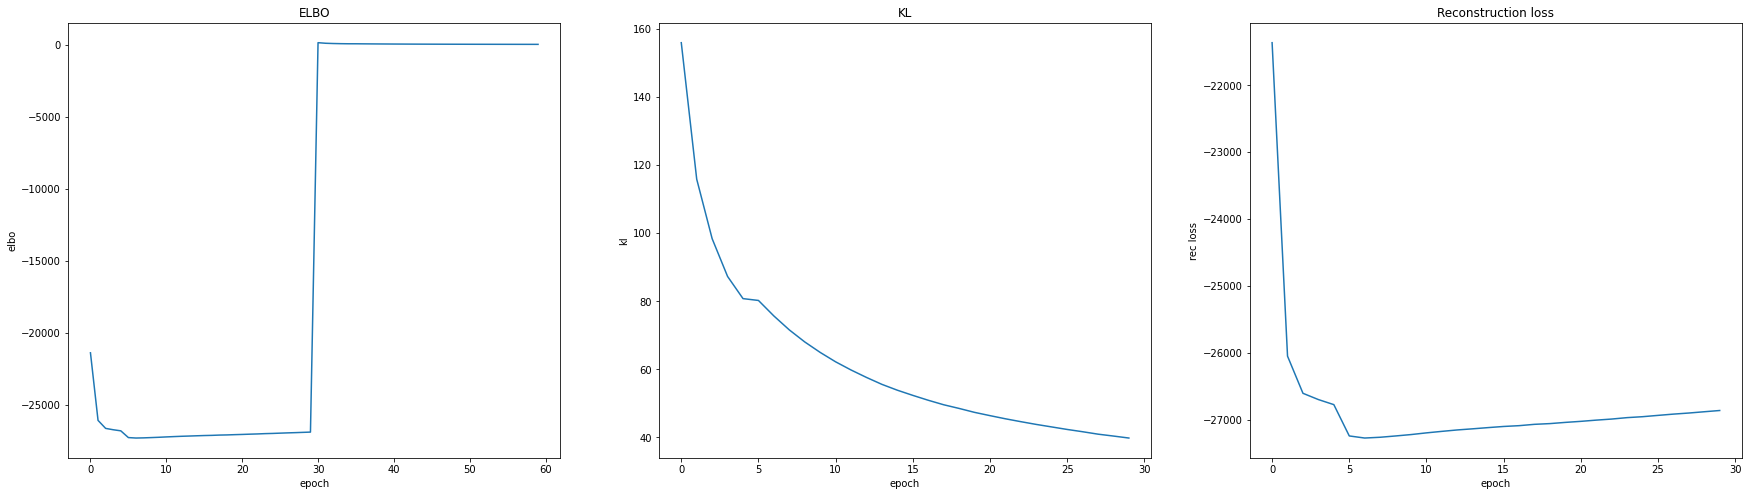

In [22]:
fig, axes = plt.subplots(ncols=3, figsize = (30, 8))

elbo = np.array(rec_hist + kl_hist)
axes[0].plot(elbo)
axes[0].set_title('ELBO')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('elbo')

axes[1].plot(kl_hist)
axes[1].set_title('KL')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('kl')

axes[2].plot(rec_hist)
axes[2].set_title('Reconstruction loss')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('rec loss')

As far as I understan, slight increase of reconstruction loss connected with increase weight $\beta$ of KL term in general loss.

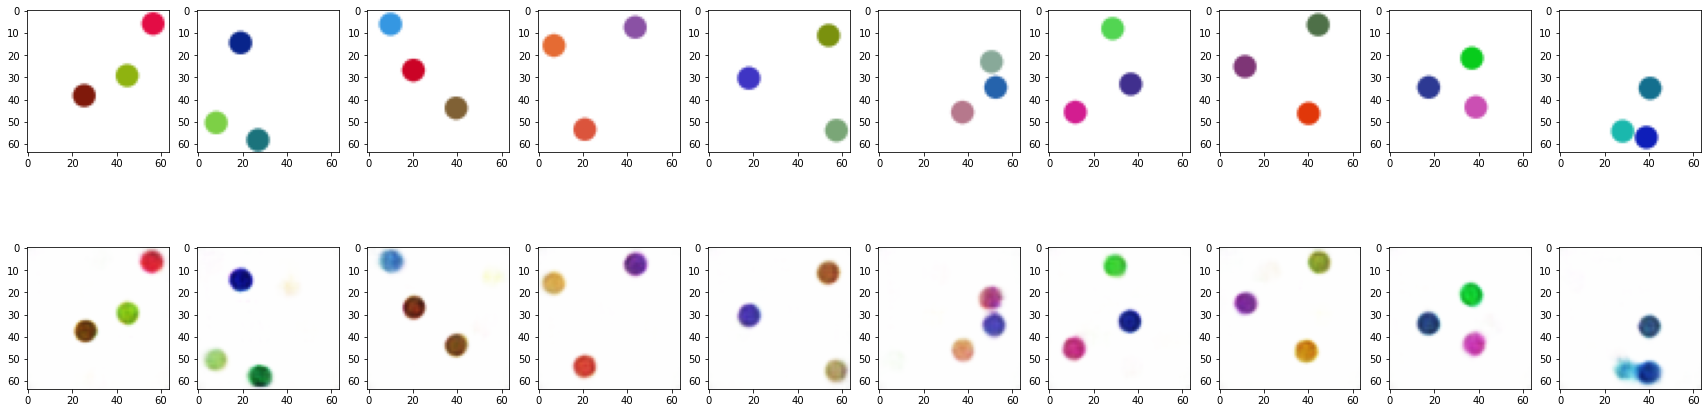

In [12]:
val_batch = next(iter(val_loader))[0][:10]
rec_val_batch = vae.reconstruct_x(val_batch.to(device))
fig, axes = plt.subplots(nrows = 2, ncols=10, figsize = (30, 8))

for i in range(10):
    axes[0][i].imshow(val_batch[i].permute(1, 2, 0).numpy())
    # axes[0][i].axis('off')
    axes[1][i].imshow(rec_val_batch[i].permute(1, 2, 0).cpu().detach().numpy())
    # axes[1][i].axis('off')




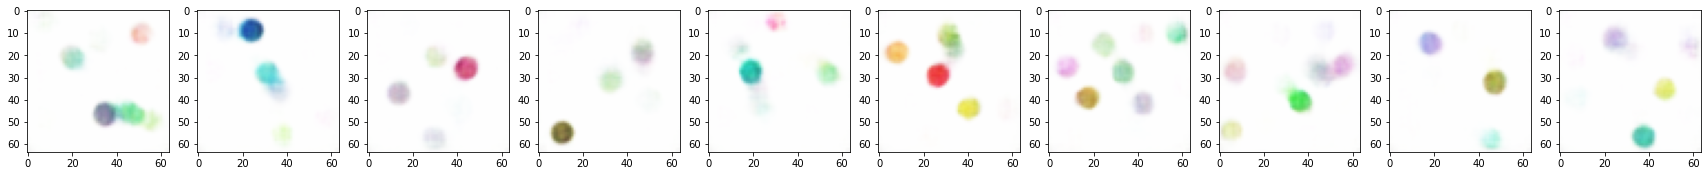

In [16]:
samples = vae.generate_x(10)
fig, axes = plt.subplots(nrows = 1, ncols=10, figsize = (30, 8))

for i in range(10):
    axes[i].imshow(samples[i].permute(1, 2, 0).cpu().detach().numpy())
    # axes[i].axis('off')




---
Some hints, that might be usefull (you do not have to use all of them):
- Use CNNs for encoder and decoder
- Use gaussian distribution for $p(x|z)$
- **Fix** variance of the $p(x|z)$ and train only mean value (aka NLL is MSE loss)
- Scale pixels of the input (dataset) and output (generated) images to [-1,1] range
- Use `Upsample` + `Conv` instead of `ConvTranspose` in the decoder
- Use $\beta$-VAE objective instead of simple ELBO:
    $$ -NLL + \beta \text{KL}(q(z|x)\|p(z))$$
$\beta$ is a hyperparameter. You can either fix it, or use so-called $\beta$-annealing. In the latter case, we gradually increase the value of $\beta$ from 0 during training.
- If reconstructions look nice but samples are bad, you probably need to put more weight on the KL-term  (larger $\beta$)

+ other standard DL tricks, e.g. lr annealing, early stopping, augmentations, etc.
---

---
<a id='Task2'></a>
**Task 2. [15 pts]: Evaluation**

Calculate NLL on a validation set, contating only 3 dots. 

In [17]:
import gc


In [24]:
# your code here
vae.eval()
total_nll = 0
with torch.no_grad():
    for X in tqdm(val_loader):
        gc.collect()
        x_batch = X[0].to(device)
        nll = vae.calculate_nll(x_batch, K = 10)
        total_nll += nll[0]
print(total_nll)

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [01:26<00:00, 11.78it/s]


tensor(-28089520., device='cuda:0')


In [20]:
# your code here
vae.eval()
total_nll = 0
with torch.no_grad():
    for X, y in tqdm(val_loader):
        gc.collect()
        x_batch = X.to(device)
        nll = vae.calculate_nll(x_batch, K = 10)
        total_nll += nll[0]
print(total_nll)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 11.43it/s]

tensor(-1755408.5000, device='cuda:0')


---
<a id='Task2'></a>
**Task 3. [5 pts]: Generalization [1]**

* Sample 25 images from the VAE and draw them on the 5 $\times$ 5 grid. 
* What can you say abuout generalization ability of the model based the results

In [21]:
torch.cuda.empty_cache()


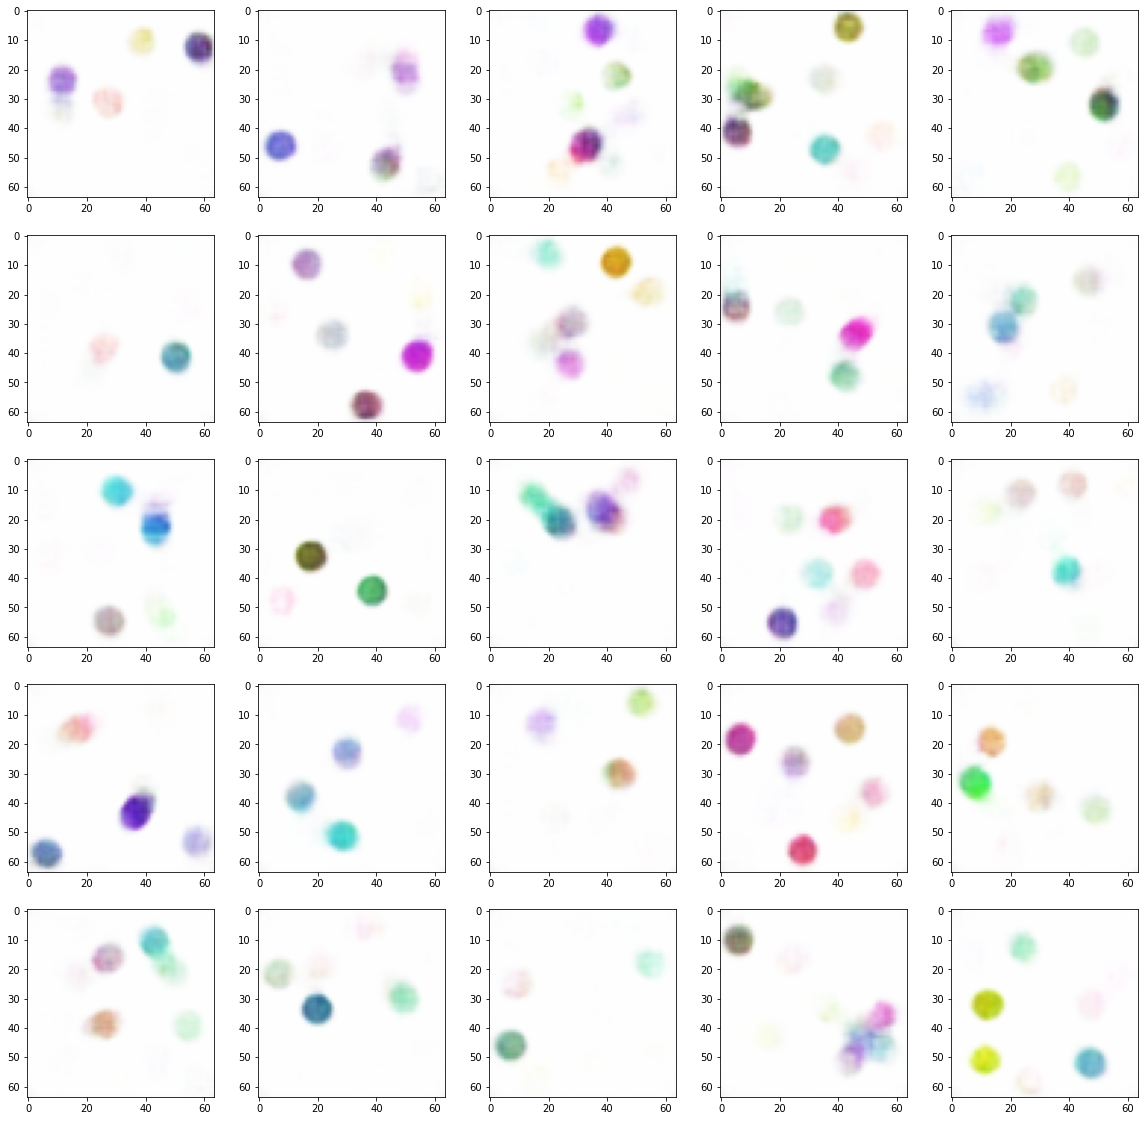

In [22]:
with torch.no_grad():
    samples = vae.generate_x(25)
fig, axes = plt.subplots(nrows = 5, ncols=5, figsize = (20, 20))

for i in range(25):
    axes[i//5][i%5].imshow(samples[i].permute(1, 2, 0).cpu().detach().numpy())
    # axes[i].axis('off')


We can see that our model is able to sample objects which corresponds to desired domain. Whereas shapes, colors and number of dots remain unstable we can clearly see that model samples dots of different colors, as expected. Also we can see that number of dots is not restricted by 3. It indicates high generalizing ability of the model

--- 
<a id='Task4'></a>
**Task 4. [10 pts]: Generalization [2]** 

* Define 2 new validation sets: containing only 2 dots (batches 6 and 7) and only 4 dots (batches 6-7) 
* Plot reconstruction of 10 random from both dataset
* Compute NLL of your VAE on these datasets
* What can you say abuout generalization ability of the model based the results


In [23]:
batch_names = [f"dots/2_dots/batch{i}.npz" for i in range(6,8)]
classes = [3 for i in range(6,8)]
data, labels = load_data(batch_names,classes)
# labels = torch.LongTensor(labels)

val_dataset_2 = ClassDataset(data, labels.long())
val_loader_2 = torch.utils.data.DataLoader(val_dataset_2, batch_size=16, shuffle=True)



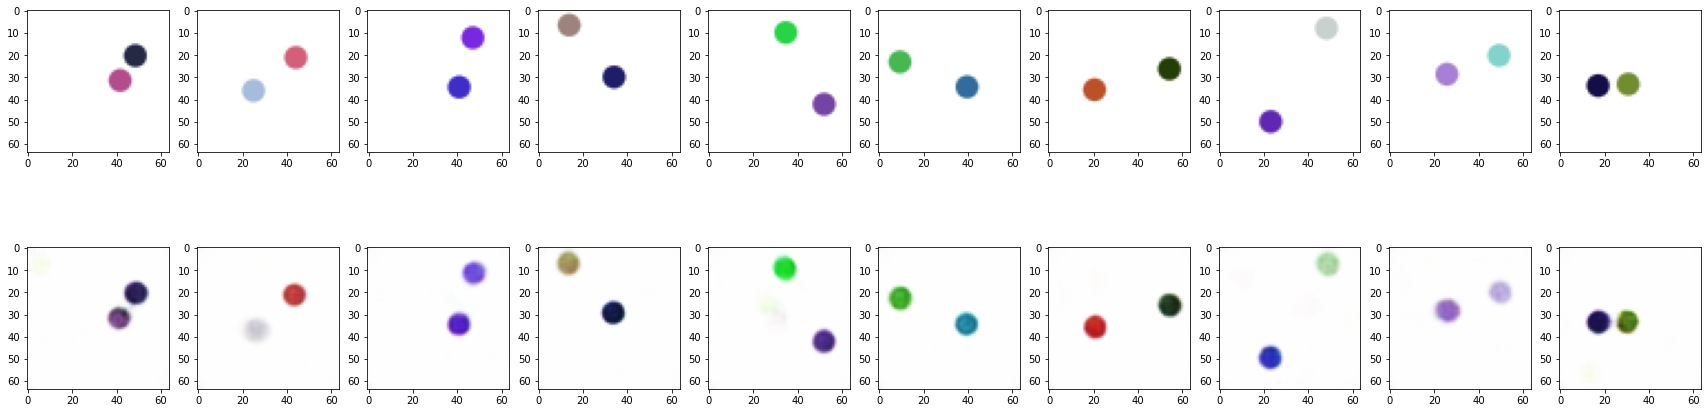

In [24]:
with torch.no_grad():
    val_batch = next(iter(val_loader_2))[0][:10]
    rec_val_batch = vae.reconstruct_x(val_batch.to(device))
fig, axes = plt.subplots(nrows = 2, ncols=10, figsize = (30, 8))

for i in range(10):
    axes[0][i].imshow(val_batch[i].permute(1, 2, 0).numpy())
    # axes[0][i].axis('off')
    axes[1][i].imshow(rec_val_batch[i].permute(1, 2, 0).cpu().detach().numpy())
    # axes[1][i].axis('off')

In [26]:
batch_names = [f"dots/4_dots/batch{i}.npz" for i in range(6,8)]
classes = [3 for i in range(6,8)]
data, labels = load_data(batch_names,classes)
# labels = torch.LongTensor(labels)

val_dataset_4 = ClassDataset(data, labels.long())
val_loader_4 = torch.utils.data.DataLoader(val_dataset_4, batch_size=16, shuffle=True)



In [29]:
val_data_2 = load_batches(train_batches, two_dots_path)
val_dataset_2 = torch.utils.data.TensorDataset(val_data_2)
val_loader_2 = torch.utils.data.DataLoader(val_dataset_2, batch_size=16, shuffle=True)

four_dots_path = "dots/4_dots/batch{}.npz"
train_batches = range(6, 8)
val_data_4 = load_batches(train_batches, four_dots_path)
val_dataset_4 = torch.utils.data.TensorDataset(val_data_4)
val_loader_4 = torch.utils.data.DataLoader(val_dataset_4, batch_size=16, shuffle=True)





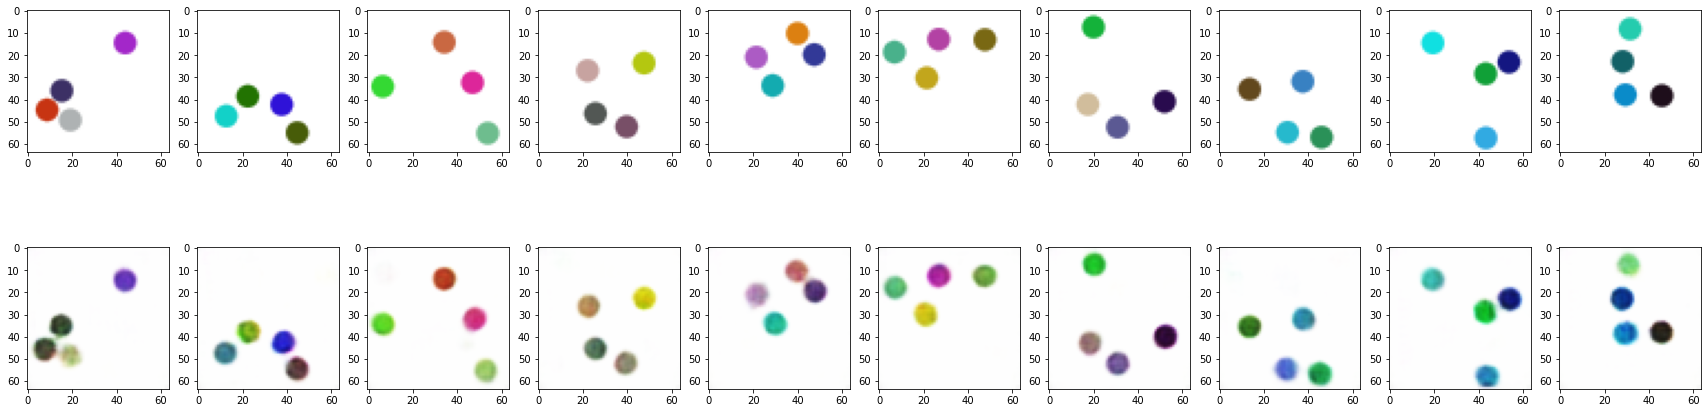

In [27]:
with torch.no_grad():
    val_batch = next(iter(val_loader_4))[0][:10]
    rec_val_batch = vae.reconstruct_x(val_batch.to(device))
fig, axes = plt.subplots(nrows = 2, ncols=10, figsize = (30, 8))

for i in range(10):
    axes[0][i].imshow(val_batch[i].permute(1, 2, 0).numpy())
    # axes[0][i].axis('off')
    axes[1][i].imshow(rec_val_batch[i].permute(1, 2, 0).cpu().detach().numpy())
    # axes[1][i].axis('off')

In [29]:
# your code here
vae.eval()
total_nll_2 = 0
with torch.no_grad():
    for X, y in tqdm(val_loader_2):
        x_batch = X.to(device)
        nll = vae.calculate_nll(x_batch, K = 10)
        total_nll_2 += nll[0]
print(f' For 2 dots dataset NLL is {total_nll_2}')

total_nll_4 = 0
with torch.no_grad():
    for X, y in tqdm(val_loader_4):
        x_batch = X.to(device)
        nll = vae.calculate_nll(x_batch, K = 10)
        total_nll_4 += nll[0]
print(f' For 4 dots dataset NLL is {total_nll_4}')

  5%|███▉                                                                               | 3/64 [00:00<00:03, 17.15it/s]

 For 2 dots dataset NLL is -1782268.875


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 11.91it/s]

 For 4 dots dataset NLL is -1718766.5


 We can see that for 2 and 4 dots reconstruction works well and NLL not far from the one for 3 dots. That indicates that generalizing ability is of high value

---
<a id='Bonus'></a>
## Bonus task [20 pts]

Assume that we want to quantify the generalization ability of the model. To do that, we need to accurately compute number of dots on all the generated images.

1. Train neural network, which will classify images based on number of dots with high probability (>95%)
2. Generate 10'000 images from you VAE
3. Classify generated images and plot the histogram

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pylab as plt

import torch
import torch.nn as nn

import torchvision

from torch.functional import F
class Classifier(nn.Module):
    def __init__(self):
        """
        z_dim: int, dimention of the latent space
        x_dim: int, input image will have size (3, x_dim, x_dim)
        """
        super(Classifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d( 3, 32, kernel_size=4, stride=2), nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=4, stride=2), nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=4, stride=2), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Flatten()
        )

        
        self.regressor = nn.Sequential(nn.Linear(512, 256),
                                       nn.ReLU(),
                                       nn.Linear(256, 128),
                                       nn.ReLU(),
                                       nn.Linear(128, 64),
                                       nn.ReLU(),
                                       nn.Linear(64, 12)
                                      )

    def forward(self, x, K =10):
        out = self.encoder(x)
        return self.regressor(out)

In [8]:
device = 'cuda'

In [9]:
classifier = Classifier().to(device)

In [4]:
def load_batches(batches,classes):
    images = None
    labels = None
    for batch, c in zip(batches, classes):
        data = np.load(batch)['images'][::16]
        length = data.shape[0]
        if images is None:
            images = data
        else:
            images = np.vstack((images, data))

        if labels is None:
            labels = torch.ones((length, 1)) * c
        else:
            labels = torch.vstack((labels,  torch.ones((length, 1)) * c))
            
    return torch.tensor(images).permute(0, 3, 1, 2), labels
# three_dots_path = "dots/3_dots/3_dots/batch{}.npz"


In [5]:
from torch.utils.data import Dataset, DataLoader
class ClassDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, data, labels, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [34]:
del class_dataset
del val_dataset
del val_dataset_2
del val_dataset_4
gc.collect()

In [10]:
batches = [f"dots/{i}_dots/batch{j}.npz" for i in range(1, 13) for j in [0, 1]]
classes = [i for i in range(1, 13) for j in [1, 2]]
data, labels = load_data(batches,classes)
# labels = torch.LongTensor(labels)

class_dataset = ClassDataset(data, labels.long())
class_train_loader = torch.utils.data.DataLoader(class_dataset, batch_size=16, shuffle=True)

In [11]:
X, y = next(iter(class_train_loader))

In [12]:
y

tensor([[ 6],
        [ 9],
        [ 9],
        [11],
        [ 3],
        [ 7],
        [ 1],
        [ 4],
        [ 9],
        [10],
        [ 6],
        [ 8],
        [ 7],
        [ 5],
        [10],
        [ 6]])

In [13]:
from tqdm import tqdm

def train_vae_classifier(train_loader, max_epoch, model, device):
    kl_hist = []
    rec_hist = []
    model = model.to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

    epoch_iterator = tqdm(range(max_epoch))
    loss_history = []
    criterion = nn.CrossEntropyLoss()
    for e in epoch_iterator:
        total_rec = 0.
        total_kl = 0.
        length = len(train_loader)
        for i, (X, y) in enumerate(train_loader):
            
            
            optimizer.zero_grad()
            X = X.to(device)
            y = y.to(device).view(-1)
            
            out = model(X)
            loss = criterion(out, y.view(-1))
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
            epoch_iterator.set_description(f'{i+1} / {length} : {loss.item() : .3f}')
            
        
    return loss_history

In [18]:
X.shape

torch.Size([16, 3, 64, 64])

In [14]:
criterion = nn.CrossEntropyLoss()
out = classifier(X.to(device))

И вот здесь начинаетcя грустная история. Я сначала пробовал обучить регрессор, чтобы не ограничиваться внутри заданного набора классов. Но качество не было 95%, и я решил делать классификатор. Кстати я еще пробовал использовать энкодер обученного VAE для извлечения латентной переменной и обучении на ней, но тоже не зашло. Так вот, у меня начали сыпаться какие то ошибки из куды, которые я не понял как фиксить. Видимо я вконец достал свою видюху за это время. А на колабе у меня кончились лимиты. 
Так что доделать этот номер я не успел, хотя вроде ничего сложного тут нет.

In [16]:
out

RuntimeError: CUDA error: device-side assert triggered

In [15]:
class_loss_history1 = train_vae_classifier(class_train_loader, 30, classifier, 'cuda')
# class_loss_history2 = train_vae_classifier(class_train_loader, 20, vae_classifier_backbone, 'cuda')

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]


RuntimeError: CUDA error: CUBLAS_STATUS_ALLOC_FAILED when calling `cublasCreate(handle)`

In [163]:
def evaluate(val_loader,  model, device = 'cuda'):
    model = model.to(device)
    model.eval()
    total_acc = 0
    number = 0
    with torch.no_grad():
        for i, (X, y) in enumerate(val_loader):
            acc = (torch.round(model(X.to(device))) == y.to(device)).sum()
            total_acc += acc
            number += X.shape[0]
            
    
    return total_acc / number

In [180]:
batches = [f"dots/{i}_dots/batch0.npz" for i in range(1, 13)]
classes = [i for i in range(1, 13)]
data, labels = load_batches(batches,classes)

val_dataset = ClassDataset(data, labels)
class_val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)

In [181]:
print(evaluate(class_val_loader, classifier))


tensor(0.8519, device='cuda:0')
